In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int64)  # iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
y_pred

array([0])

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

2023-11-27 22:33:47.135537: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 22:33:47.135590: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 22:33:47.135604: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 22:33:47.227791: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.14.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

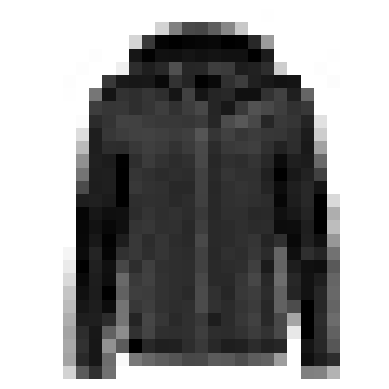

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
# to make this notebook's output stable across runs
np.random.seed(42)

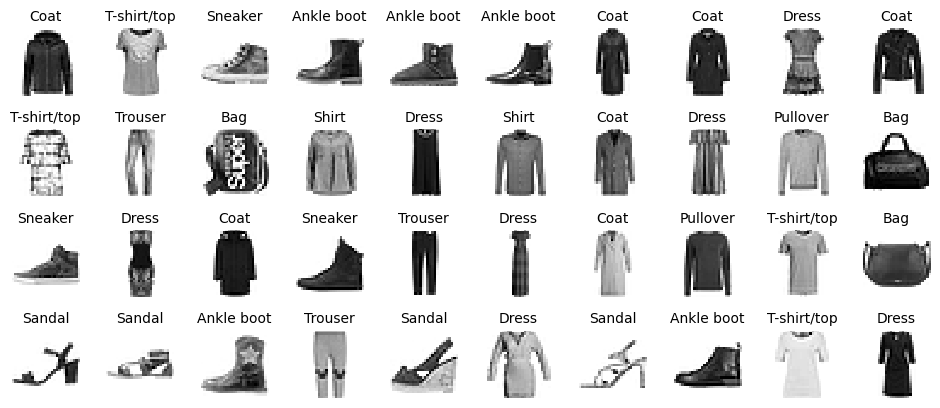

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=10)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2023-11-27 22:33:53.095525: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 22:33:53.275534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 22:33:53.276136: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.layers

In [16]:
model.layers[3].name

'dense_2'

In [17]:
weights, biases = model.layers[1].get_weights()

In [18]:
weights

array([[ 8.6881220e-05,  4.8953056e-02, -2.0913921e-02, ...,
         1.6885214e-02, -5.1868960e-02, -6.4760536e-02],
       [ 4.5936391e-02,  5.0110392e-02, -4.8572630e-02, ...,
         6.4223692e-02,  5.9615538e-02, -2.4380129e-02],
       [-4.2596854e-02,  5.4198176e-02, -6.9629729e-02, ...,
        -5.8896750e-02, -6.9902048e-02, -1.0183781e-02],
       ...,
       [ 6.1582297e-02,  4.4336513e-02, -2.5220674e-02, ...,
        -6.3537985e-02,  1.0193095e-02, -6.0541105e-02],
       [-4.4717044e-02,  3.6185451e-02, -4.4051766e-02, ...,
         2.8695576e-02,  9.7609982e-03, -3.1899735e-03],
       [ 6.4998284e-02, -7.7845976e-03, -6.1866567e-02, ...,
         5.5636689e-02, -6.8449028e-02,  7.3642299e-02]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-11-27 22:33:57.250015: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4ba40229b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-27 22:33:57.250045: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 960M, Compute Capability 5.0
2023-11-27 22:33:57.508301: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-11-27 22:33:57.593353: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 7s 3ms/step - loss: 0.7074 - accuracy: 0.7671 - val_loss: 0.5065 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4829 - accuracy: 0.8304 - val_loss: 0.4528 - val_accuracy: 0.8458
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4395 - accuracy: 0.8459 - val_loss: 0.4155 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4120 - accuracy: 0.8543 - val_loss: 0.4129 - val_accuracy: 0.8572
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3916 - accuracy: 0.8617 - val_loss: 0.3902 - val_accuracy: 0.8646
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8673 - val_loss: 0.3828 - val_accuracy: 0.8612
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3622 - accuracy: 0.8719 - val_loss: 0.3603 - val_accuracy: 0.8740
Epo

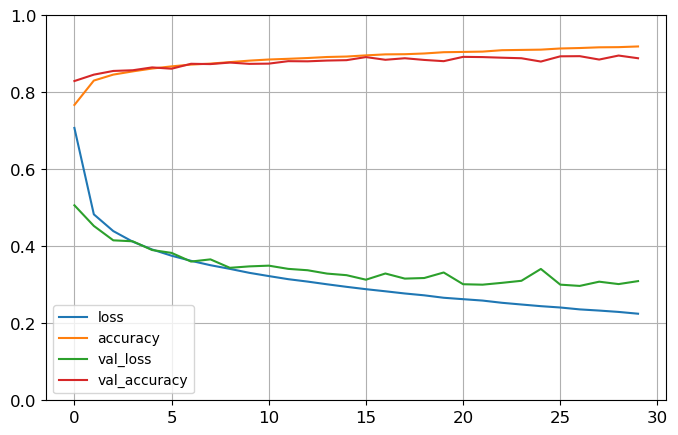

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 53.2626 - accuracy: 0.8619


[53.26264953613281, 0.8618999719619751]

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2216 - accuracy: 0.9199 - val_loss: 0.2948 - val_accuracy: 0.8980
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2179 - accuracy: 0.9215 - val_loss: 0.2873 - val_accuracy: 0.8984
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2138 - accuracy: 0.9234 - val_loss: 0.2942 - val_accuracy: 0.8958
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2115 - accuracy: 0.9242 - val_loss: 0.3157 - val_accuracy: 0.8902
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2078 - accuracy: 0.9260 - val_loss: 0.2943 - val_accuracy: 0.8964
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2050 - accuracy: 0.9270 - val_loss: 0.2998 - val_accuracy: 0.8934
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2006 - accuracy: 0.9289 - val_loss: 0.2885 - val_accuracy:

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 70.8252 - accuracy: 0.8594


[70.82522583007812, 0.8593999743461609]

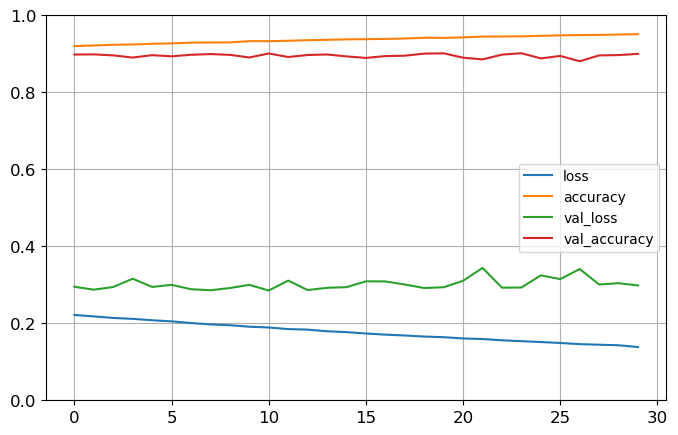

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 81ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 19ms/step


array([9, 2, 1])

In [31]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [32]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

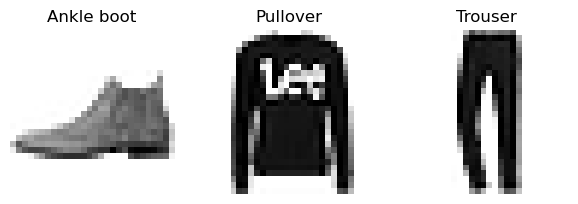

In [33]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [34]:
# BUILDING A REGRESSION MLP USING THE SEQUENTIAL API

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [40]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]  # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.1146 - val_loss: 0.6235
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5323 - val_loss: 0.5236
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4683 - val_loss: 0.4873
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4367 - val_loss: 0.4555
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4193 - val_loss: 0.4437
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4058 - val_loss: 0.4338
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3970 - val_loss: 0.4351
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3886 - val_loss: 0.4214
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3820 - val_loss: 0.4223
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3758 - val_loss: 0.4159

In [41]:
mse_test

2.6693499088287354

In [42]:
y_pred

array([[0.71026886],
       [2.3128152 ],
       [8.616452  ]], dtype=float32)

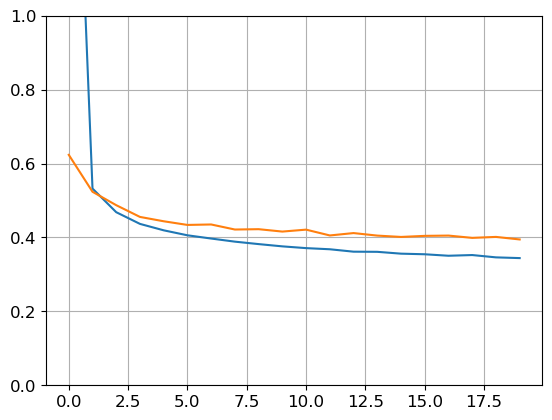

In [43]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [44]:
# BUILDING COMPLEXE MODELS USING THE FUNCTIONAL API

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]  # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 5.6496 - val_loss: 21.0209
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.2296 - val_loss: 8.4154
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 85.3371 - val_loss: 1.9157
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5865 - val_loss: 0.8391
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5561 - val_loss: 0.5606
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5096 - val_loss: 0.5612
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5010 - val_loss: 0.6664
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5131 - val_loss: 0.5335
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4953 - val_loss: 0.5471
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6469 - val_loss: 0.49

In [45]:
mse_test

0.5264607667922974

In [46]:
y_pred

array([[0.74327147],
       [1.400399  ],
       [2.7265065 ]], dtype=float32)

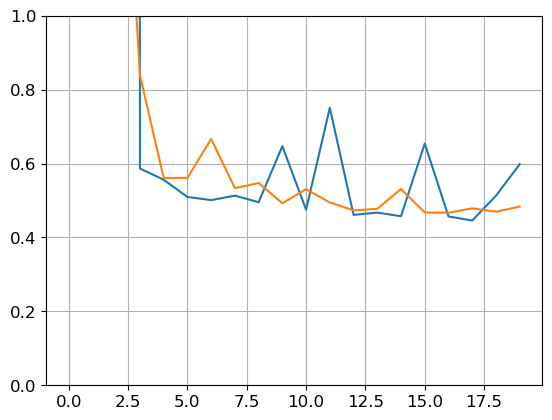

In [47]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [57]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [58]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.2264 - val_loss: 0.9494
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7941 - val_loss: 0.7106
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6777 - val_loss: 0.6500
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6321 - val_loss: 0.6184
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6014 - val_loss: 0.5944
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5772 - val_loss: 0.5770
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5575 - val_loss: 0.5609
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5413 - val_loss: 0.5507
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5277 - val_loss: 0.5396
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5162 - val_loss: 0.5303

1/1 [==============================] - 0s 47ms/step


In [59]:
mse_test

0.45000705122947693

In [60]:
y_pred

array([[0.44444376],
       [1.9165952 ],
       [3.712346  ]], dtype=float32)

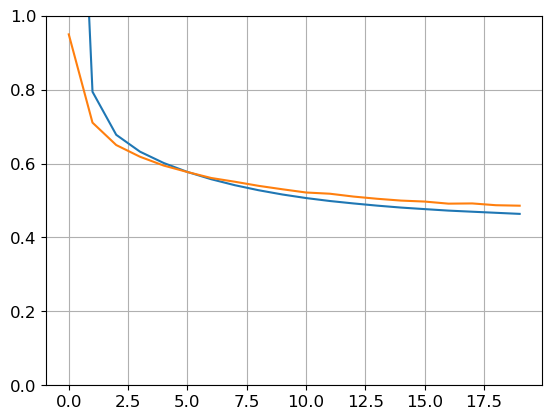

In [61]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [63]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [64]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7843 - main_output_loss: 0.6867 - aux_output_loss: 1.6629 - val_loss: 0.5436 - val_main_output_loss: 0.4898 - val_aux_output_loss: 1.0279
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5088 - main_output_loss: 0.4626 - aux_output_loss: 0.9242 - val_loss: 0.5277 - val_main_output_loss: 0.4864 - val_aux_output_loss: 0.8993
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4859 - main_output_loss: 0.4512 - aux_output_loss: 0.7986 - val_loss: 0.5166 - val_main_output_loss: 0.4839 - val_aux_output_loss: 0.8111
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4694 - main_output_loss: 0.4411 - aux_output_loss: 0.7243 - val_loss: 0.4942 - val_main_output_loss: 0.4664 - val_aux_output_loss: 0.7442
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4554 - main_output_loss: 0.4311 - aux_output_loss: 0.6745 - val_loss

In [65]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 3.3626 - main_output_loss: 3.2973 - aux_output_loss: 3.9504


In [66]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 69ms/step


In [71]:
# USING THE SUBCLASSING API TO BUILD DYNAMIC MODELS

class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [72]:
model = WideAndDeepModel()
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.2529 - output_1_loss: 1.1154 - output_2_loss: 2.4900 - val_loss: 0.8840 - val_output_1_loss: 0.8148 - val_output_2_loss: 1.5073
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5967 - output_1_loss: 0.5195 - output_2_loss: 1.2921 - val_loss: 0.8925 - val_output_1_loss: 0.8539 - val_output_2_loss: 1.2393
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.9199 - output_1_loss: 0.8925 - output_2_loss: 1.1664 - val_loss: 0.5120 - val_output_1_loss: 0.4474 - val_output_2_loss: 1.0932
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4843 - output_1_loss: 0.4291 - output_2_loss: 0.9811 - val_loss: 0.4968 - val_output_1_loss: 0.4455 - val_output_2_loss: 0.9581
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4595 - output_1_loss: 0.4147 - output_2_loss: 0.8622 - val_loss: 0.4765 - val_output_1_loss: 0.4341 - val_ou

In [73]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 3.0342 - output_1_loss: 3.1158 - output_2_loss: 2.2998


In [74]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 76ms/step


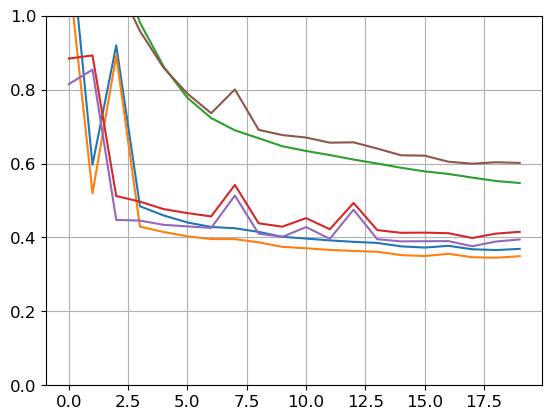

In [75]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [82]:
# SAVING AND RESTORING A MODEL AND USING CALLBACKS

model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [83]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")  # roll back to the best model

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 0.3395 - main_output_loss: 0.3287 - aux_output_loss: 0.4363 - val_loss: 0.3925 - val_main_output_loss: 0.3787 - val_aux_output_loss: 0.5167
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3407 - main_output_loss: 0.3301 - aux_output_loss: 0.4357 - val_loss: 0.4105 - val_main_output_loss: 0.3964 - val_aux_output_loss: 0.5369
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3395 - main_output_loss: 0.3290 - aux_output_loss: 0.4340 - val_loss: 0.4042 - val_main_output_loss: 0.3893 - val_aux_output_loss: 0.5380
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3369 - main_output_loss: 0.3265 - aux_output_loss: 0.4312 - val_loss: 0.4045 - val_main_output_loss: 0.3906 - val_aux_output_loss: 0.5297
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3361 - main_output_loss: 0.3258 - aux_output_loss: 0.4281 - val_loss

In [84]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=100,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3310 - main_output_loss: 0.3209 - aux_output_loss: 0.4219 - val_loss: 0.4043 - val_main_output_loss: 0.3900 - val_aux_output_loss: 0.5325
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3311 - main_output_loss: 0.3214 - aux_output_loss: 0.4191 - val_loss: 0.4030 - val_main_output_loss: 0.3904 - val_aux_output_loss: 0.5169
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3308 - main_output_loss: 0.3208 - aux_output_loss: 0.4202 - val_loss: 0.4036 - val_main_output_loss: 0.3892 - val_aux_output_loss: 0.5331
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3308 - main_output_loss: 0.3210 - aux_output_loss: 0.4188 - val_loss: 0.4062 - val_main_output_loss: 0.3921 - val_aux_output_loss: 0.5333
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3286 - main_output_loss: 0.3189 - aux_output_loss: 0.4160 - val

/usr/local/miniconda3/envs/tf_gpu/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 4ms/step - loss: 0.3252 - main_output_loss: 0.3158 - aux_output_loss: 0.4097 - val_loss: 0.3912 - val_main_output_loss: 0.3784 - val_aux_output_loss: 0.5065
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3265 - main_output_loss: 0.3170 - aux_output_loss: 0.4118 - val_loss: 0.3856 - val_main_output_loss: 0.3728 - val_aux_output_loss: 0.5006
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3250 - main_output_loss: 0.3157 - aux_output_loss: 0.4089 - val_loss: 0.4267 - val_main_output_loss: 0.4129 - val_aux_output_loss: 0.5512
Epoch 11/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3253 - main_output_loss: 0.3160 - aux_output_loss: 0.4092 - val_loss: 0.3833 - val_main_output_loss: 0.3700 - val_aux_output_loss: 0.5027
Epoch 12/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3231 - main_output_loss: 0.3140 - aux_output_loss: 0.4054 - val_loss: 0.

In [85]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [86]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=1,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - ETA: 0s - loss: 0.3204 - main_output_loss: 0.3116 - aux_output_loss: 0.3999
val/train: 1.29
363/363 [==============================] - 1s 4ms/step - loss: 0.3204 - main_output_loss: 0.3116 - aux_output_loss: 0.3999 - val_loss: 0.4148 - val_main_output_loss: 0.4035 - val_aux_output_loss: 0.5171
